In [1]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import random

/Users/mikawi/anaconda3/lib/python3.11/site-packages/Bio/__init__.py:138: BiopythonWarning: You may be importing Biopython from inside the source tree. This is bad practice and might lead to downstream issues. In particular, you might encounter ImportErrors due to missing compiled C extensions. We recommend that you try running your code from outside the source tree. If you are outside the source tree then you have a setup.py file in an unexpected directory: /Users/mikawi/anaconda3/lib/python3.11/site-packages
  warnings.warn(


## reading Input.fasta

In [2]:
# Path to the input.fasta file
fasta_file = "input.fasta"

# Read all sequences from the fasta file
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Print the sequences
for seq in sequences:
    print(seq.id)
    print(seq.seq)


MINE01
AGGAACAGGATGAACAGTTTATCCCCCTCTTTCAAGAAATATTTCTCATAGAGGAGCTTCAGTTGACTTAAGAATCTTCAGATTACATTTAGCAGGATTCTCTTCAATCCTAGGAGCTATCAACTTCATTACAACTATTTTAAATATACGACCAAAAAACTTAAATCTAGAATTAATCCCTTTATTTGTATGATCTGTTCTAATCACAGCAATTTTATTATTACTTAGATTACCAGTCTTAGCAGCAGCTATTACCATACTTCTAACAGATCGTAATCTCAATACCTCATTTTTCGACCCTGCAGGTGGAGGAGACCCAATCCTTTACCAACACTTATTCTGATTTTTTGGTCACCCTGAAGTTTACATTCTTATTCTACCAGGATTTGGTATTATTTCTCACATTATCTCATTCCATAGAGGAAAAAAAAATCCTTTCGGAAATTTAGGTATAATCTATGCTATATTAACTATTGGAATTTTAGGATTCATTGTATGAGCTCATCACATATTCACTATTGGTCTTGATATTGATACT
MINE03
AGGAACAGGATGAACAGTTTATCCCCCTCTTTCAAGAAATATTTCTCATAGAGGAGCTTCAGTTGACTTAAGAATCTTCAGATTACATTTAGCAGGATTCTCTTCAATCCTAGGAGCTATCAACTTCATTACAACTATTTTAAATATACGACCAAAAAACTTAAATCTAGAATTAATCCCTTTATTTGTATGATCTGTTCTAATCACAGCAATTTTATTATTACTTAGATTACCAGTCTTAGCAGCAGCTATTACCATACTTCTAACAGATCGTAATCTCAATACCTCATTTTTCGACCCTGCAGGTGGAGGAGACCCAATCCTTTACCAACACTTATTCTGATTTTTTGGTCACCCTGAAGTTTACATTCTTATTCTACCAGGATTTGGTATTATTTCTCACATTATCTCATTCCATAGAGGAAAAAAAAATCCTTTCGGAAATTT

### Generate 20 random protein sequences of each sequences of input fiel at least 30% identical from input file input.fasta

In [3]:
import random

# Define the 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Read the first sequence from the input FASTA file
with open('input.fasta', 'r') as f:
    sequences = f.read().split('>')[1:]
    original_sequence = sequences[0].split('\n', 1)[1].replace('\n', '')

# Function to calculate the percentage of identity between two sequences
def calculate_identity(seq1, seq2):
    return sum(a == b for a, b in zip(seq1, seq2)) / len(seq1)

# Function to generate a random protein sequence that is at least 30% identical to a given sequence
def generate_similar_sequence(original):
    while True:
        new_sequence = ''.join(random.choice(amino_acids) if random.random() < 0.7 else aa for aa in original)
        if calculate_identity(original, new_sequence) >= 0.3:
            return new_sequence

# Generate 20 random protein sequences
random_sequences = [generate_similar_sequence(original_sequence) for _ in range(20)]

# Print the random sequences
for i, seq in enumerate(random_sequences):
    print(f'random_{i+1}')
    print(seq)

# write them to output.fasta without the same sequence id
with open('output.fasta', 'w') as f:
    for i, seq in enumerate(random_sequences):
        f.write(f'>random_{i+1}\n{seq}\n')

random_1
ACGRDCNTQATHAACARNTKAQSPNCETCIITCAGYNATKSMYRNAQADCCAGGAQIKQYDEPCVACCDLSGEACCTQIEGAMTWTATYKAGEWFNANIWGDKPGSAYCHTLEAAKIAATTTACVTPATRACADCLRTSIHHRALWTKCNKLTAAAAWAGIPAAATKTNNDWLENGWAQCSNPAFSTGTAGGNHFHSPTKTEAWSTCANCARCWTHAWQAYHLEPCASASSAPCCENCMTAGCTGENKLFASTEHYKEACETDTYSASGQNQGTYMDCCIAARIYFKCFRTTFDWECCCCRQGAIITQWNGGIKWCDQAAPSAHTKNTADRAEGTRAKTCIHAQQQTWHYHTCDCCSTGYQGQITACAFQCFKSTNRQACSAHRCETHDLFAQNGYLKCPCACLKRYECHCNWFYRPHALFLTLWANSWYARTWCADTQTGMSWGTGACGNKGQESKKKQGGVKTAVWCEHTATQGGAAVFSMDGHDTKCAGPHTATGDHCKCIFCACAVWTCRDFMWGMSVTVMTQHTATQGATSMV
random_2
WGTSLDTGTHRLHCCAMYTSSTATSCWILKDLKAAWAKPWAKARCTNTMPAATDHSCEKQMVYKPKQACNVLHRYCTQKIGAWGGCRYKALVWAGAAPTGNCNTNANKACTPGDNCCGAMFASDMTPEDCCQRACGYTMLSYAFTKRLWGSDIAAHGFEITTVQGGTMDSHQKTMKTTSKAVTMTTSAEIYNYYVRCTTYTMLIFNDAKCHGLTNGRDRAETCQTARHATPAAPAMHCRTFSEIGCACHQADTANFNPRCTFCRAMKDCHGCDTALNAKVAAAAGCDCLKLNMTSCAHCCCGWKGYFGCWVQEIACCCGATACTTNICCWAFAASEQCTCNGWTMTTTMFGKCMCHIKGAYFQPKASALCKWTADTYIASLAQSAMFRYMFVDWYTKWEGFRTETTSCWTSHTVTCATWGEIWIHWAVFAMQNLCTHTCKSRA

# check for Alignment

In [4]:
#!/usr/bin/python3
def check_alignment(file):
    sequences = [str(record.seq) for record in SeqIO.parse(file, "fasta")]
    length = len(sequences[0])
    for seq in sequences:
        if len(seq) != length:
            return False
    return True

print(check_alignment("output.fasta"))

True


# Phylogenetic Tree Construction

This Python script uses the BioPython library to construct phylogenetic trees from a multiple sequence alignment in a FASTA file. The trees are constructed using the UPGMA (Unweighted Pair Group Method with Arithmetic Mean) and NJ (Neighbor Joining) methods.

## Requirements

- BioPython

## Usage



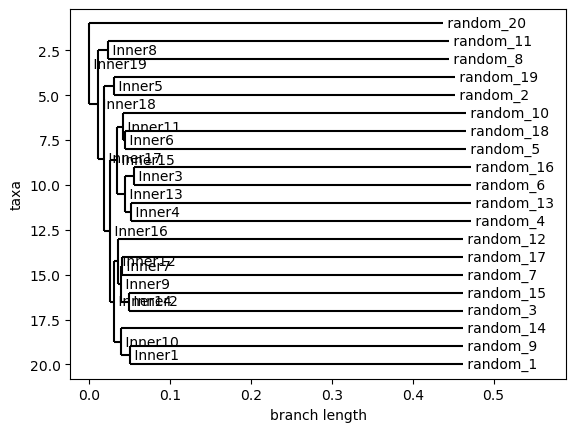

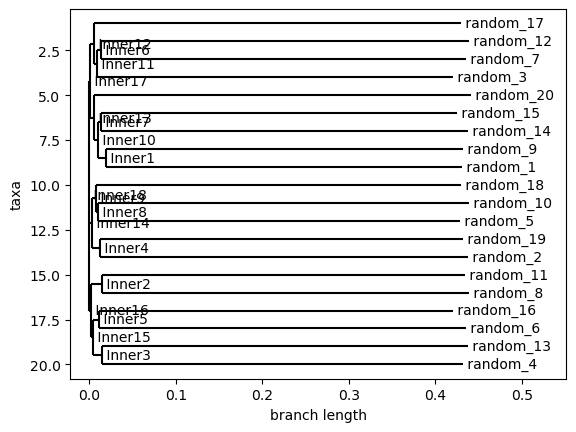

In [5]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Read the fasta file and convert it into a dictionary
alignment = AlignIO.read('output.fasta', 'fasta')

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the phylogenetic tree using the UPGMA method
constructor = DistanceTreeConstructor()
upgma_tree = constructor.upgma(dm)

# Construct the phylogenetic tree using the Neighbor Joining method
nj_tree = constructor.nj(dm)

# Draw the UPGMA and NJ trees
Phylo.draw(upgma_tree)
Phylo.draw(nj_tree)


## Explanation

1. The script first reads a multiple sequence alignment from a FASTA file using the `AlignIO.read` function.

2. It then calculates a distance matrix from the alignment using the `DistanceCalculator` class with the 'identity' model, which calculates the proportion of mismatches between sequences.

3. The script constructs a phylogenetic tree from the distance matrix using the UPGMA method, which clusters sequences based on their pairwise distances.

4. The script also constructs a phylogenetic tree using the NJ method, which also uses pairwise distances but takes a different approach to clustering.

5. Finally, the script draws the UPGMA and NJ trees using the `Phylo.draw` function.

# Phylogenetic Tree Visualization

This Python script uses the BioPython and ETE Toolkit libraries to visualize phylogenetic trees. The trees are first constructed using the UPGMA (Unweighted Pair Group Method with Arithmetic Mean) and NJ (Neighbor Joining) methods, and then visualized using the ETE Toolkit.

## Requirements

- BioPython
- ETE Toolkit

In [6]:
from ete3 import Tree, TreeStyle
from io import StringIO
from Bio import Phylo

# Add a root name to the trees
upgma_tree.root.name = "Root"
nj_tree.root.name = "Root"

# Remove internal node names
for clade in upgma_tree.find_clades():
    if not clade.is_terminal():
        clade.name = ""
for clade in nj_tree.find_clades():
    if not clade.is_terminal():
        clade.name = ""

# Convert the Bio.Phylo trees to Newick format and then to ETE trees
upgma_newick = StringIO()
Phylo.write(upgma_tree, upgma_newick, format="newick")
upgma_ete_tree = Tree(upgma_newick.getvalue())

nj_newick = StringIO()
Phylo.write(nj_tree, nj_newick, format="newick")
nj_ete_tree = Tree(nj_newick.getvalue())

# Create a TreeStyle object for customizing the tree's appearance
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

# Show the trees
upgma_ete_tree.show(tree_style=ts)
nj_ete_tree.show(tree_style=ts)



## Explanation

1. The script first adds a root name to the UPGMA and NJ trees.

2. It then removes the internal node names from the trees. This is done because the ETE Toolkit does not support internal node names in the Newick format.

3. The script converts the Bio.Phylo trees to Newick format and then to ETE trees. This is done using the `Phylo.write` function and the `Tree` class from the ETE Toolkit.

4. The script creates a `TreeStyle` object to customize the appearance of the trees. It sets the `show_leaf_name`, `show_branch_length`, and `show_branch_support` attributes to `True` to display the leaf names, branch lengths, and branch support values, respectively.

5. Finally, the script displays the trees using the `show` method of the `Tree` class. The `tree_style` parameter is set to the `TreeStyle` object to apply the custom appearance.
